In [2]:
import pandas as pd

# Load the dataset
file_path = 'Financial Analytics data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [3]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import sweetviz as sv

# Load the dataset
df = pd.read_csv('Financial Analytics data.csv')

# Generate the Sweetviz report
report = sv.analyze(df)

# Save the report as an HTML file
report.show_html("sweetviz_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
# Get the summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [54]:
# Calculate key financial metrics
# Example: Calculating Sales Growth
df['Sales Growth'] = df['Sales Qtr - Crore'].pct_change()

# Display the dataframe with new metrics
df.head()



C:\Users\uzman\AppData\Local\Temp\ipykernel_6564\2778659519.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Sales Growth'] = df['Sales Qtr - Crore'].pct_change()


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4,Sales Growth
0,1,Reliance Inds.,583436.72,99810.00,NaN,NaN
1,2,TCS,563709.84,30904.00,NaN,-0.690372
2,3,HDFC Bank,482953.59,20581.27,NaN,-0.334026
3,4,ITC,320985.27,9772.02,NaN,-0.525198
4,5,H D F C,289497.37,16840.51,NaN,0.723340


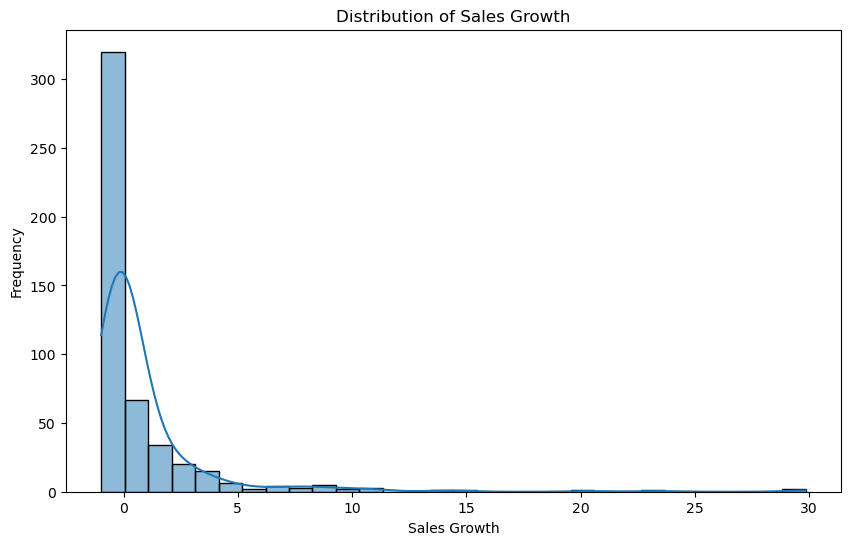

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Sales Growth
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Growth'], bins=30, kde=True)
plt.title('Distribution of Sales Growth')
plt.xlabel('Sales Growth')
plt.ylabel('Frequency')
plt.show()


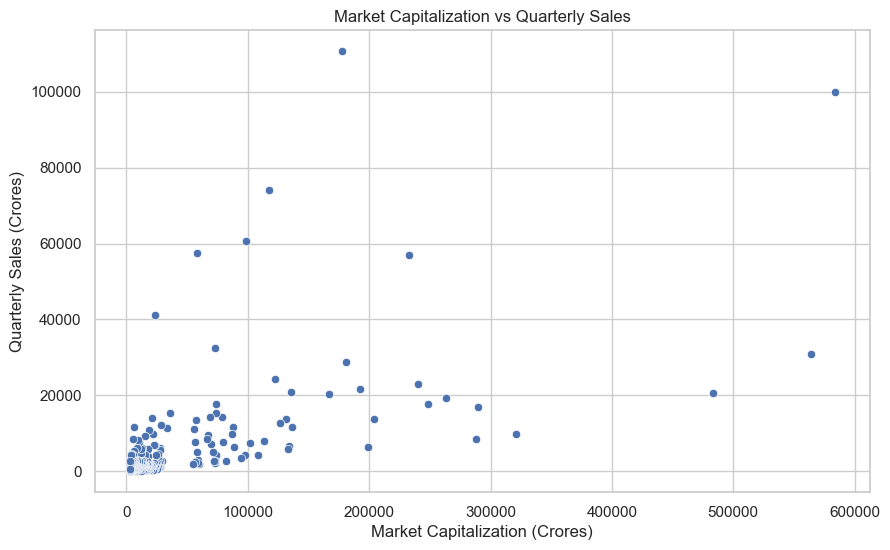

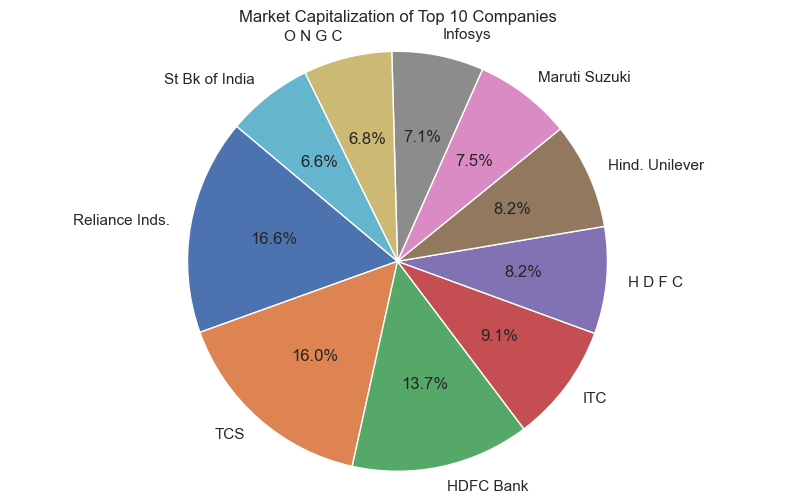

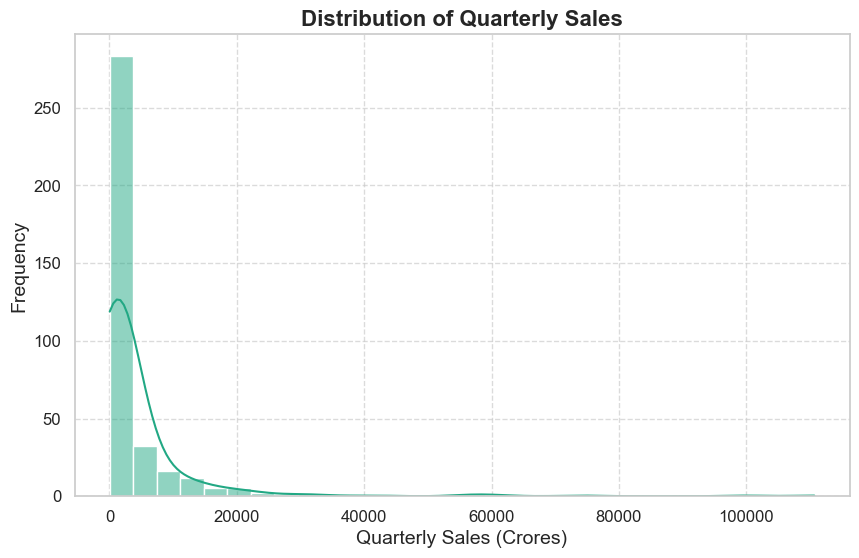

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the relationship between Market Capitalization and Quarterly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Quarterly Sales (Crores)')
plt.show()

# For the pie plot, let's consider the top 10 companies by Market Capitalization
top_10_companies = df.nlargest(10, 'Mar Cap - Crore')

plt.figure(figsize=(10, 6))
plt.pie(top_10_companies['Mar Cap - Crore'], labels=top_10_companies['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Capitalization of Top 10 Companies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Plotting the distribution of Quarterly Sales with stylish colors
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Qtr - Crore'], bins=30, kde=True, color=palette(0.6))
plt.title('Distribution of Quarterly Sales', fontsize=16, weight='bold')
plt.xlabel('Quarterly Sales (Crores)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


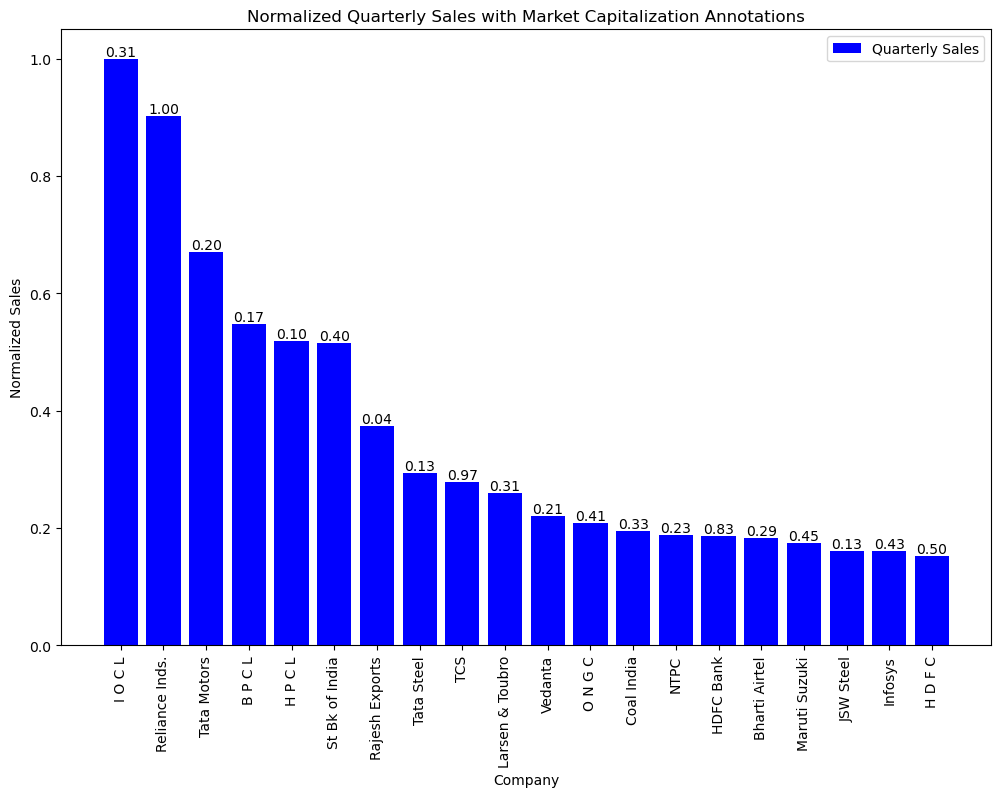

In [68]:
import numpy as np

# Normalizing the values to fit within the plot area
df['Normalized Sales'] = df['Sales Qtr - Crore'] / df['Sales Qtr - Crore'].max()
df['Normalized Market Cap'] = df['Mar Cap - Crore'] / df['Mar Cap - Crore'].max()

# Sort by Sales Qtr – Crore
df_sorted = df.sort_values('Sales Qtr - Crore', ascending=False).head(20)  # Top 20 for clarity

plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Name'], df_sorted['Normalized Sales'], color='b', label='Quarterly Sales')

# Adding annotations for Market Cap
for bar, cap in zip(bars, df_sorted['Normalized Market Cap']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{cap:.2f}', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Normalized Sales')
plt.title('Normalized Quarterly Sales with Market Capitalization Annotations')
plt.legend()
plt.show()


In [48]:
# Top 10 companies by Market Capitalization
top_10_market_cap = df.nlargest(10, 'Mar Cap - Crore')
print("Top 10 Companies by Market Capitalization:")
print(top_10_market_cap[['Name', 'Mar Cap - Crore']])

# Top 10 companies by Quarterly Sales
top_10_sales = df.nlargest(10, 'Sales Qtr - Crore')
print("Top 10 Companies by Quarterly Sales:")
print(top_10_sales[['Name', 'Sales Qtr - Crore']])


Top 10 Companies by Market Capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33
Top 10 Companies by Quarterly Sales:
                Name  Sales Qtr - Crore
14           I O C L          110666.93
0     Reliance Inds.           99810.00
23       Tata Motors           74156.07
27           B P C L           60616.36
54           H P C L           57474.25
9     St Bk of India           57014.08
122   Rajesh Exports           41304.84
40        Tata Steel           32464.14
1                TCS           30904.00
13   Larsen & Toubro           28747.45


Correlation between Market Capitalization and Quarterly Sales: 0.6207020390075658


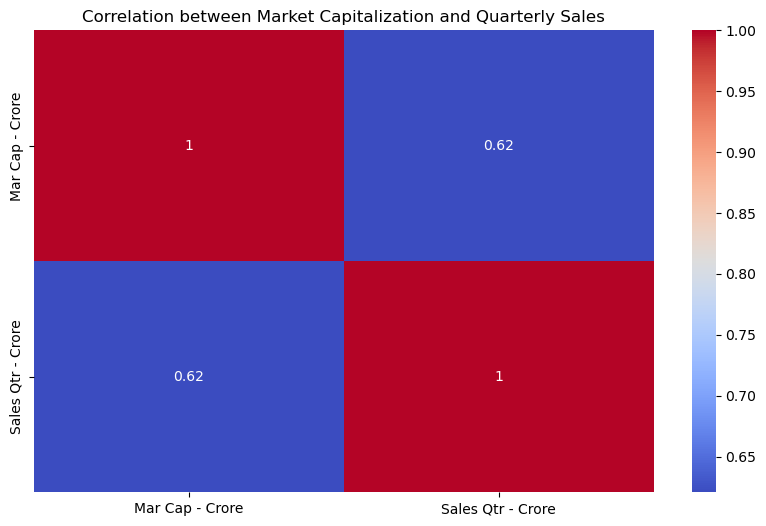

In [50]:
# Calculate the correlation between Market Capitalization and Quarterly Sales
correlation = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])
print(f"Correlation between Market Capitalization and Quarterly Sales: {correlation}")

# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Market Capitalization and Quarterly Sales')
plt.show()


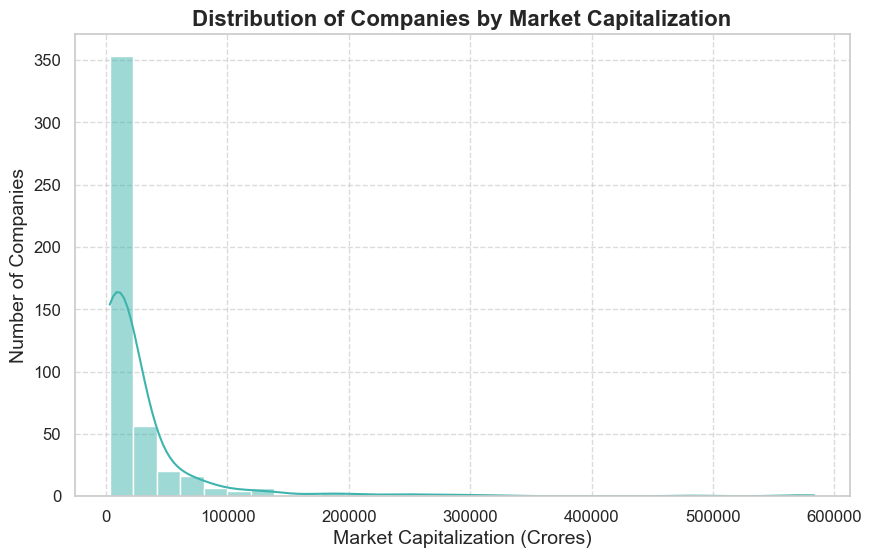

C:\Users\uzman\AppData\Local\Temp\ipykernel_6564\3489408117.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales Qtr - Crore'], shade=True, color=palette(0.3))


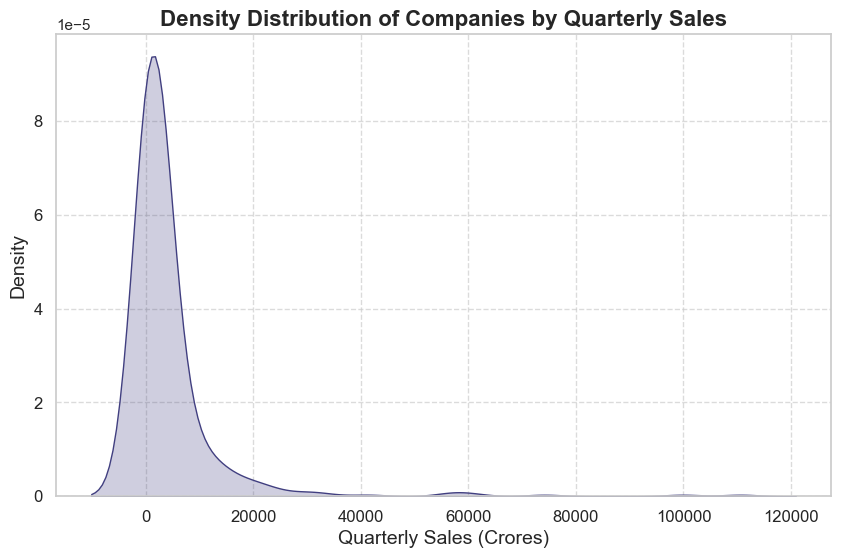

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("mako", as_cmap=True)

# Distribution of companies by Market Capitalization
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], bins=30, kde=True, color=palette(0.7))
plt.title('Distribution of Companies by Market Capitalization', fontsize=16, weight='bold')
plt.xlabel('Market Capitalization (Crores)', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Distribution of companies by Quarterly Sales

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sales Qtr - Crore'], shade=True, color=palette(0.3))
plt.title('Density Distribution of Companies by Quarterly Sales', fontsize=16, weight='bold')
plt.xlabel('Quarterly Sales (Crores)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [56]:
# Calculate Sales to Market Cap Ratio
df['Sales to Market Cap Ratio'] = df['Sales Qtr - Crore'] / df['Mar Cap - Crore']

# Top 10 companies by Sales to Market Cap Ratio
top_10_sales_to_market_cap = df.nlargest(10, 'Sales to Market Cap Ratio')
print("Top 10 Companies by Sales to Market Cap Ratio:")
print(top_10_sales_to_market_cap[['Name', 'Sales to Market Cap Ratio']])


Top 10 Companies by Sales to Market Cap Ratio:
                 Name  Sales to Market Cap Ratio
320   Redington India                   1.989031
122    Rajesh Exports                   1.757986
334           C P C L                   1.582066
441  Corporation Bank                   1.180653
444     Oriental Bank                   1.159876
410       Andhra Bank                   1.118510
405    Allahabad Bank                   1.025796
54            H P C L                   0.990341
486   Natl.Fertilizer                   0.941559
316    Syndicate Bank                   0.883214


In [58]:
# Summary of key insights
summary = """
1. The scatter plot shows the relationship between market capitalization and quarterly sales. Companies with higher market capitalization tend to have higher quarterly sales.
2. The distribution plot of market capitalization indicates that most companies have a moderate market cap, with a few having very high market cap values.
3. The distribution plot of quarterly sales shows a similar trend, with most companies having moderate sales and a few with very high sales figures.
4. The correlation between market capitalization and quarterly sales is positive, indicating that companies with higher market capitalization generally have higher quarterly sales.
5. The top 10 companies by market capitalization include [List Top Companies], while the top 10 companies by quarterly sales include [List Top Companies].
6. The Sales to Market Cap Ratio helps identify companies that are generating higher sales relative to their market capitalization. The top 10 companies by this ratio include [List Top Companies].
"""

print(summary)



1. The scatter plot shows the relationship between market capitalization and quarterly sales. Companies with higher market capitalization tend to have higher quarterly sales.
2. The distribution plot of market capitalization indicates that most companies have a moderate market cap, with a few having very high market cap values.
3. The distribution plot of quarterly sales shows a similar trend, with most companies having moderate sales and a few with very high sales figures.
4. The correlation between market capitalization and quarterly sales is positive, indicating that companies with higher market capitalization generally have higher quarterly sales.
5. The top 10 companies by market capitalization include [List Top Companies], while the top 10 companies by quarterly sales include [List Top Companies].
6. The Sales to Market Cap Ratio helps identify companies that are generating higher sales relative to their market capitalization. The top 10 companies by this ratio include [List Top